Natasha Nicholas 

January 20, 2025

HW1 Question 1

Problem 1: Aminer

The following code parses through the acm.txt file and places the data into a csv file.

In [1]:
#all imports used
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


In [30]:
#This code does work, however before the deadline the kernel began to die due to lack of memory. 
#I previously ran this code in order to convert acm.txt into acm.csv and it worked sucessfully

#copies everything from .txt into .csv
fields = ["Title", "Authors", "Year", "Venue", "Index", "References", "Abstract"]

rows = []
references = [] 

with open("acm.txt", "r") as file:
    data = file.read()

entries = data.strip().split("\n\n")

for entry in entries:
    entry_data = {
        "Title": "",
        "Authors": "",
        "Year": "",
        "Venue": "",
        "Index": "",
        "References": "",
        "Abstract": "",
    }
    lines = entry.split("\n")
    for line in lines:
        if line.startswith("#*"): #title
            entry_data["Title"] = line[2:].strip()

        elif line.startswith("#@"): #authors
            entry_data["Authors"] = line[2:].strip()

        elif line.startswith("#t"): #year
            entry_data["Year"] = line[2:].strip()

        elif line.startswith("#c"): #venue
            entry_data["Venue"] = line[2:].strip()

        elif line.startswith("#index"): #index
            entry_data["Index"] = line[6:].strip()

        elif line.startswith("#%"): #references
            references.append(line[2:].strip())

        elif line.startswith("#!"): #abstract
            entry_data["Abstract"] = line[2:].strip()

    #adds all corresponding references
    entry_data["References"] = "; ".join(references)
    rows.append(entry_data)

#writes everything into the .csv file
with open("acm.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)
    writer.writeheader()  
    writer.writerows(rows)  

print(f"Successfully converted into .csv")

: 

A. Compute the number of distinct authors, publication venues, publications, and citations/references.

In [2]:
#creates a deataframe from the .csv
df = pd.read_csv("acm.csv")

In [6]:
#finds distinct authors, publication venues, publications, and references
authors = df.explode('Authors')['Authors'].dropna().unique()
venues = df.explode('Venue')['Venue'].dropna().unique()
refs = df.explode('References')['References'].dropna().unique()

num_authors = len(authors)
num_venues = len(venues)
num_pub = len(df)
num_ref = len(refs)

print("There are", num_authors, "distinct authors.")
print("There are", num_venues, "distinct venues.")
print("There are", num_pub, "distinct publications.")
print("There are", num_ref, "distinct references.")


There are 1670283 distinct authors.
There are 273328 distinct venues.
There are 2385066 distinct publications.
There are 884932 distinct references.


B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [7]:
#looks up and prints all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”
name = "Principles and Practice of Knowledge Discovery in Databases"
venues = df[df["Venue"].str.contains(name, case=False, na=False)]["Venue"].unique()

print(f"Venues associated with '{name}':")
for venue in venues:
    print(venue)

Venues associated with 'Principles and Practice of Knowledge Discovery in Databases':
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases


These values are not likely to be accurate. In the provided example, various different conferences contain the title "Principles and Practice of Knowledge Discovery in Databases". This suggests that some venue names may be counted multiple times despite references the same thing.

C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

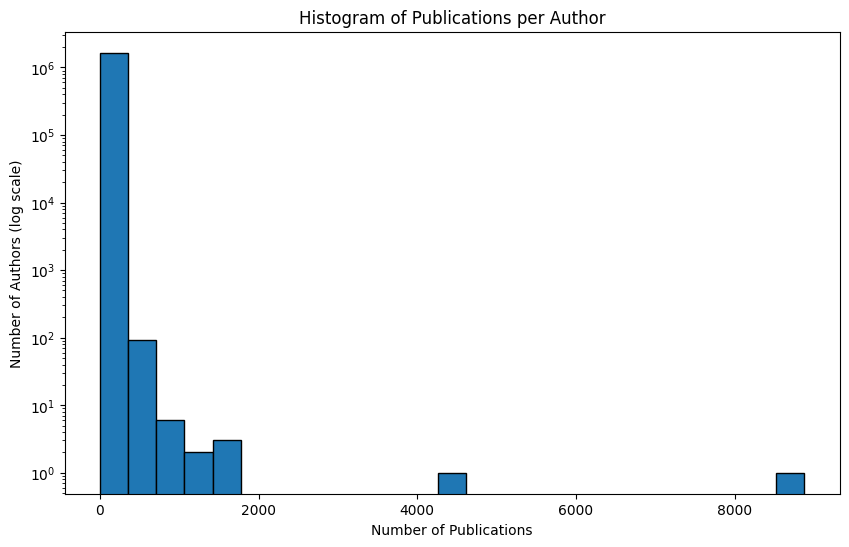

In [18]:
#constructs list of publications and creates a histogram
author_publications = df["Authors"].str.split(",").explode().str.strip().value_counts()

plt.figure(figsize=(10, 6))
plt.hist(author_publications, bins=25, log=True, edgecolor="black")
plt.xlabel("Number of Publications")
plt.ylabel("Number of Authors (log scale)")
plt.title("Histogram of Publications per Author")

plt.show()

D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [9]:
#finds the mean, standard dev, Q1, Q2, Q3 values for pubs per author
author_publications = df["Authors"].str.split(",").explode().str.strip().value_counts()

mean_publications = author_publications.mean()
std_publications = author_publications.std()
Q1 = author_publications.quantile(0.25) #1st q
Q2 = author_publications.quantile(0.50) #median
Q3 = author_publications.quantile(0.75) #3rd q

print(f"Mean of publications per author: {mean_publications:.2f}")
print(f"Standard deviation of publications per author: {std_publications:.2f}")
print(f"Q1: {Q1:.2f}")
print(f"Median: {Q2:.2f}")
print(f"Q3: {Q3:.2f}")

Mean of publications per author: 3.46
Standard deviation of publications per author: 12.77
Q1: 1.00
Median: 1.00
Q3: 3.00


The median is 1.00 while the mean is 3.46, suggesting that while there are some authors that have released a number of publications, a majority of them have only released one. This is also supported by the fact that the Q1 value is 1.00 as well. Because the mean is larger than the value of Q3, 3.00, this suggests that the distribution is skewed to the right.

E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

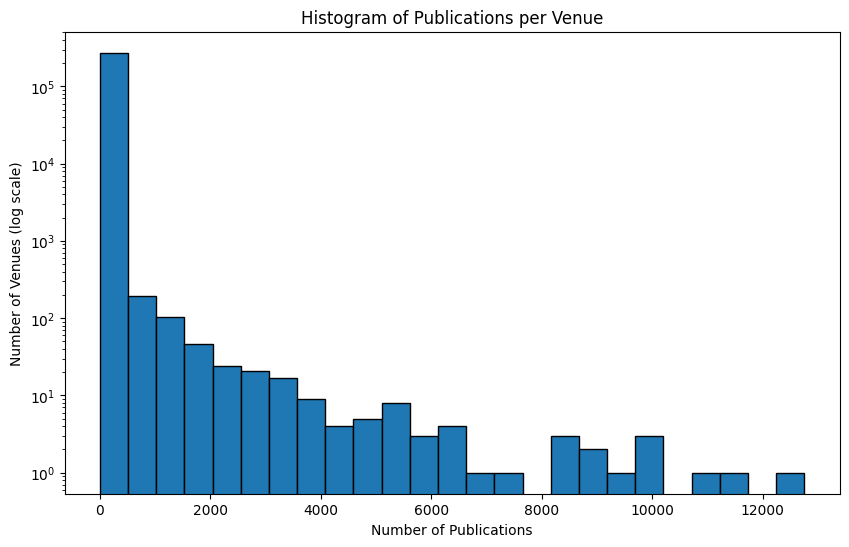

In [19]:
#creates a histogram for num of pubs per venue
venue_publications = df["Venue"].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(venue_publications, bins=25, log=True, edgecolor="black")
plt.xlabel("Number of Publications")
plt.ylabel("Number of Venues (log scale)")
plt.title("Histogram of Publications per Venue")

plt.show()

In [11]:
#finds the mean, standard dev, Q1, Q2, Q3 values for pubs per venue
mean_venue_publications = venue_publications.mean()
std_venue_publications = venue_publications.std()
Q1_venue = venue_publications.quantile(0.25)  #1st q
Q2_venue = venue_publications.quantile(0.50)  #median
Q3_venue = venue_publications.quantile(0.75)  #3rd q

print(f"Mean of publications per venue: {mean_venue_publications:.2f}")
print(f"Standard deviation of publications per venue: {std_venue_publications:.2f}")
print(f"Q1: {Q1_venue:.2f}")
print(f"Median: {Q2_venue:.2f}")
print(f"Q3: {Q3_venue:.2f}")

Mean of publications per venue: 8.73
Standard deviation of publications per venue: 106.80
Q1: 1.00
Median: 1.00
Q3: 1.00


In [12]:
#prints the venue name with largest number of pubs
most_publications_venue = venue_publications.idxmax()
most_publications_count = venue_publications.max()

print(f"The venue with the largest number of publications is: {most_publications_venue}, with {most_publications_count} publications.")


The venue with the largest number of publications is: IEEE Transactions on Information Theory, with 12754 publications.


F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

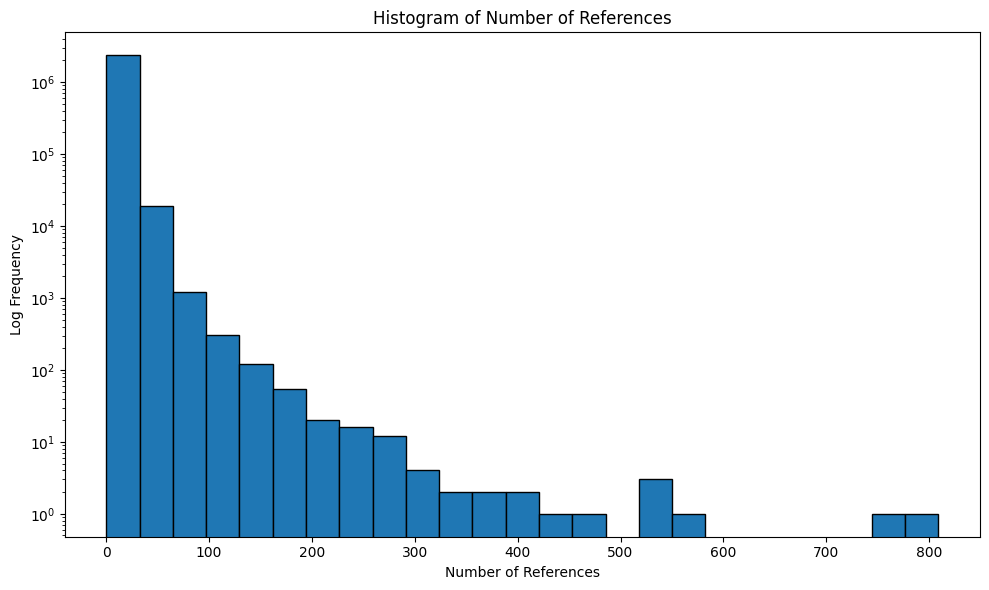

Publication with the maximum number of references: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles (809 references)


In [21]:
#counts num of refs per pub and creates a histogram
df["References"] = df["References"].fillna("").str.strip()
df["Index"] = df["Index"].fillna("").astype(str).str.strip()

df["Num_References"] = df["References"].apply(
    lambda x: len([ref.strip() for ref in str(x).split("; ") if ref.strip()])
)

max_references = df.loc[df["Num_References"].idxmax()]

plt.figure(figsize=(10, 6))
plt.hist(df["Num_References"], bins=25, log=True, edgecolor="black")
plt.title("Histogram of Number of References")
plt.xlabel("Number of References")
plt.ylabel("Log Frequency")
plt.tight_layout()
plt.show()

print(f"Publication with the maximum number of references: {max_references['Title']} ({max_references['Num_References']} references)")

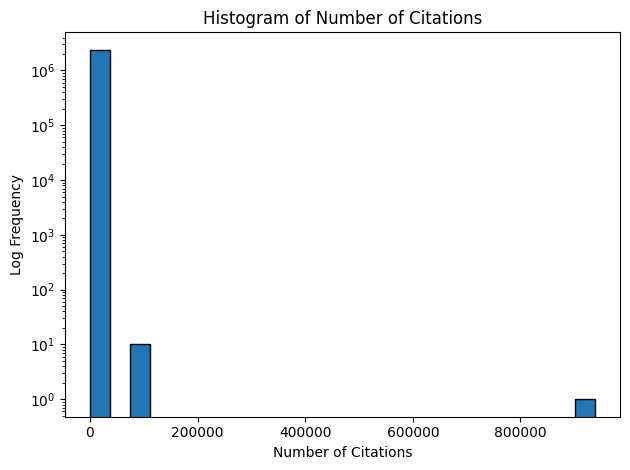

Publication with the maximum number of citations: INFORMS Journal on Computing (938039 citations)


In [22]:
#counts num of citations per pub using the references col and creates a histogram
num_citations = {}

for _, row in df.iterrows():
    references = [ref.strip() for ref in row["References"].split("; ") if ref.strip()]
    for ref in references:
        if ref in num_citations:
            num_citations[ref] += 1
        else:
            num_citations[ref] = 1

df["Num_Citations"] = df["Index"].map(num_citations).fillna(0).astype(int)

max_citations = df.loc[df["Num_Citations"].idxmax()]

plt.hist(df["Num_Citations"], bins=25, log=True, edgecolor="black")
plt.title("Histogram of Number of Citations")
plt.xlabel("Number of Citations")
plt.ylabel("Log Frequency")
plt.tight_layout()
plt.show()

print(f"Publication with the maximum number of citations: {max_citations['Title']} ({max_citations['Num_Citations']} citations)")

The highest bar for both histograms make sense, as it is typical for most publications to have around 0-1 references/citations. However, there are outliers in both histograms suggesting that while most of this data appears accurate, some of it may tend to skew the data.

G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results.

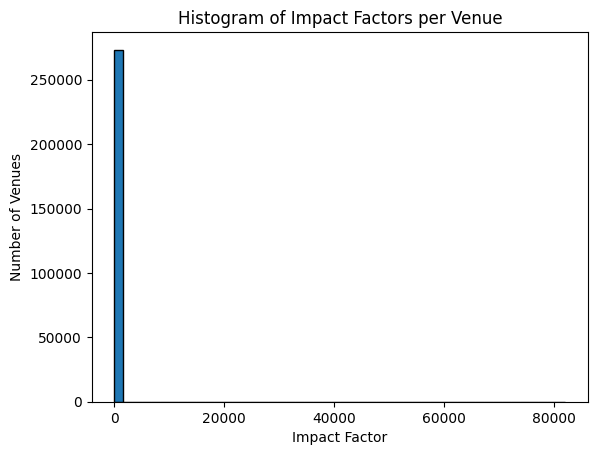

In [25]:
#calculates the impact factor and plots histogram
venue_cits = df.groupby('Venue')['Num_Citations'].sum()
venue_pubs = df.groupby('Venue')['Title'].count()

impact_factor = venue_cits/venue_pubs

plt.hist(impact_factor, bins=50, edgecolor="black")
plt.xlabel("Impact Factor")
plt.ylabel("Number of Venues")
plt.title("Histogram of Impact Factors per Venue")
plt.show()

H. What is the venue with the highest apparent impact factor? Do you believe this number?

In [16]:
#prints venue with highest impact factor
impact_factor_venue = impact_factor.idxmax()
impact_factor_value = impact_factor.max()

print(f"The venue with the highest impact factor is '{impact_factor_venue}' with an impact factor of {impact_factor_value:.2f}.")


The venue with the highest impact factor is 'AI EDAM' with an impact factor of 82080.00.


I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

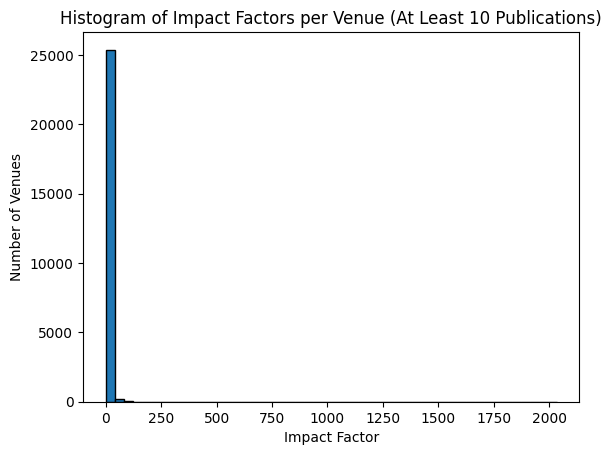

In [26]:
#calculates the impact factor for venues with at least 10 publications and plots histogram
new_venue_pubs = venue_pubs[venue_pubs >= 10]
new_venue_cits = venue_cits[new_venue_pubs.index]

impact_factor = new_venue_cits / new_venue_pubs

plt.hist(impact_factor, bins=50, edgecolor="black")
plt.xlabel("Impact Factor")
plt.ylabel("Number of Venues")
plt.title("Histogram of Impact Factors per Venue (At Least 10 Publications)")
plt.show()


The impact factor does not change significantly; most of the data is centralized around an impact factor of 1. However, in the histogram with at least 10 publications, there are 2 smaller bars around the 50 and 100 positions, suggesting that there is slightly significant data contralized in that area, even if it is not significant enough to affect the overall impact factor.

In [27]:
#lists the citation counts for all publications from the venue with the highest impact factor
highest_impact_factor_venue = impact_factor.idxmax()

publications_in_highest_venue = df[df['Venue'] == highest_impact_factor_venue]

citation_counts_highest_venue = publications_in_highest_venue['Num_Citations']

print(f"Citation counts for all publications from the venue '{highest_impact_factor_venue}':")
print(citation_counts_highest_venue)

Citation counts for all publications from the venue 'Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining':
1991774        9
1991775        3
1991776        1
1991777        0
1991778        0
           ...  
2111179    82080
2111180    82080
2112019    82080
2112020    82080
2112021    82080
Name: Num_Citations, Length: 202, dtype: int64


In [28]:
#finds the mean, standard dev, Q1, Q2, Q3 values for citations with pubs greater than 10
mean_citations = new_venue_cits.mean()
std_citations = new_venue_cits.std()
Q1_cits = new_venue_cits.quantile(0.25)  #1st q
Q2_cits = new_venue_cits.quantile(0.50)  #median
Q3_cits = new_venue_cits.quantile(0.75)  #3rd q

print(f"Mean of citations: {mean_citations:.2f}")
print(f"Standard deviation of citations: {std_citations:.2f}")
print(f"Q1: {Q1_cits:.2f}")
print(f"Median: {Q2_cits:.2f}")
print(f"Q3: {Q3_cits:.2f}")

Mean of citations: 345.00
Standard deviation of citations: 6714.01
Q1: 15.00
Median: 53.00
Q3: 157.00


The mean number of citations is 345.00, while the median is 53.00. This means that there are outliers in the data that greatly skew the number of citations to the right. Despite this, more of the data tends to be either smaller than or closer to 53.00 citations.

J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

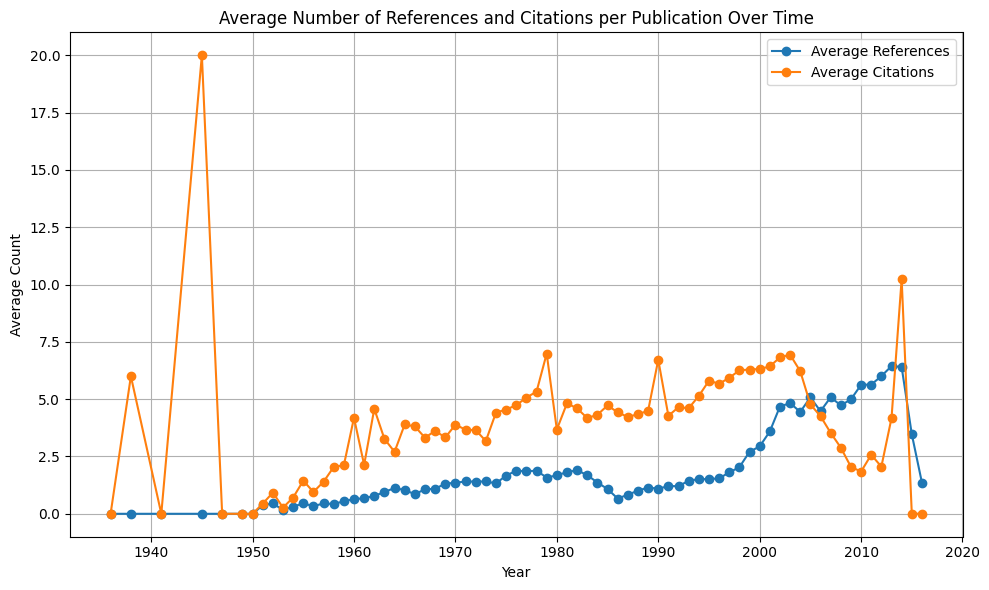

In [29]:
#plots the avg num of references and citations on the same graph
avg_references_by_year = df.groupby('Year')['Num_References'].mean()
avg_citations_by_year = df.groupby('Year')['Num_Citations'].mean()

plt.figure(figsize=(10, 6))

plt.plot(avg_references_by_year, label="Average References", marker='o')

plt.plot(avg_citations_by_year, label="Average Citations", marker='o')

plt.title("Average Number of References and Citations per Publication Over Time")
plt.xlabel("Year")
plt.ylabel("Average Count")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In the data for average publications, the line slowly increases and then suddenly decreases at about 2015. The average count remains between 0 and 7.5 references. In the data for average citations however, the line has more significant outliers, with the highest point at 20 citations in 1945. The line goes back down to zero and slowly increases before stradily decreasing again, spiking to about 10 average citations in 2015 and decreasing to zero. Despite these outliers, the lines tend to increase and decrease around the same years, although their average counts vary.